In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn import metrics
All4=pd.read_csv("data/Complete_Data/All_Four_Datasets.csv")
All4.head()

,Date,Public Holidays,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,MONTH,...,February,January,July,June,March,May,November,October,September,Payday
0,2010-01-01,True,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,January,...,0,1,0,0,0,0,0,0,0,True
1,2010-01-02,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,January,...,0,1,0,0,0,0,0,0,0,False
2,2010-01-03,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,January,...,0,1,0,0,0,0,0,0,0,False
3,2010-01-04,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,January,...,0,1,0,0,0,0,0,0,0,False
4,2010-01-05,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,January,...,0,1,0,0,0,0,0,0,0,False


In [2]:
data = All4.set_index('Date')
data.head()

,Public Holidays,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,MONTH,ARSON,...,February,January,July,June,March,May,November,October,September,Payday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,True,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,January,0.0,...,0,1,0,0,0,0,0,0,0,True
2010-01-02,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,January,0.0,...,0,1,0,0,0,0,0,0,0,False
2010-01-03,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,January,0.0,...,0,1,0,0,0,0,0,0,0,False
2010-01-04,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,January,0.0,...,0,1,0,0,0,0,0,0,0,False
2010-01-05,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,January,0.0,...,0,1,0,0,0,0,0,0,0,False


In [3]:
data.columns

Index(['Public Holidays', 'School Holidays', 'labor force', 'employment',
       'unemployment', 'unemployment rate', 'Area', 'DAY', 'MONTH', 'ARSON',
       'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER', 'TOTAL', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Payday'],
      dtype='object')

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=111)
print(test.shape)
print(train.shape)

(658, 45)
(2629, 45)


In [15]:
DX =['Public Holidays','School Holidays','unemployment rate','PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday', 'April', 'August', 'December', 'February', 'January','July', 'June', 'March', 'May', 'November', 'October', 'September']
DY = 'TOTAL'

In [38]:
x_train= train[DX]
y_train= train[DY]
x_test= test[DX]
y_test= test[DY]

MLPR

In [17]:

MLP = nn.MLPRegressor(random_state = 0)
MLP.fit(x_train, y_train)
y_pred = MLP.predict(x_test)

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
testscore = MLP.score(x_test,y_test)
trainscore = MLP.score(x_train, y_train)
print("MLPC test:", testscore)
print("MLPC train:", trainscore)

MLPC test: 0.3585376755489963
MLPC train: 0.3786301993888046


In [39]:
MLP = nn.MLPRegressor(random_state = 0)
MLP.fit(X_train, y_train)

MAE_MLP_TRAIN = metrics.mean_absolute_error(y_train, MLP.predict(x_train))
MAE_MLP_TEST = metrics.mean_absolute_error(y_test, MLP.predict(x_test))


MSE_MLP_TRAIN = metrics.mean_squared_error(y_train, MLP.predict(x_train))
MSE_MLP_TEST = metrics.mean_squared_error(y_test, MLP.predict(x_test))


RMSE_MLP_TRAIN = np.sqrt(metrics.mean_squared_error(y_train, MLP.predict(x_train)))
RMSE_MLP_TEST = np.sqrt(metrics.mean_squared_error(y_test, MLP.predict(x_test)))

R2_MLP_TRAIN = metrics.r2_score(y_train, MLP.predict(x_train))
R2_MLP_TEST = metrics.r2_score(y_test, MLP.predict(x_test))

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
print('Mean Absolute Error of Train:', MAE_MLP_TRAIN)
print('Mean Absolute Error of Test:', MAE_MLP_TEST)

print('Mean Squared Error of Train:', MSE_MLP_TRAIN)
print('Mean Squared Error of Test:', MSE_MLP_TEST)

print('Root Mean Squared Error of Train:', RMSE_MLP_TRAIN)
print('Root Mean Squared Error of Test:', RMSE_MLP_TEST)

print("r2 of MLPR of Train is", R2_MLP_TRAIN)
print("r2 of MLPR of Test is", R2_MLP_TEST)

Mean Absolute Error of Train: 11.672042390678635
Mean Absolute Error of Test: 12.406920754192534
Mean Squared Error of Train: 217.48954741645852
Mean Squared Error of Test: 248.14656019472264
Root Mean Squared Error of Train: 14.747526823723987
Root Mean Squared Error of Test: 15.752668351575318
r2 of MLPR of Train is 0.3786301993888046
r2 of MLPR of Test is 0.3585376755489963


In [31]:
MAE_MLP = metrics.mean_absolute_error(y_test, y_pred)
MSE_MLP = metrics.mean_squared_error(y_test, y_pred)
RMSE_MLP = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_MLP = metrics.r2_score(y_test, y_pred)

In [33]:
print('Mean Absolute Error:', MAE_MLP)
print('Mean Squared Error:', MSE_MLP)
print('Root Mean Squared Error:', RMSE_MLP)
print("r2 of MLPR is", R2_MLP)

Mean Absolute Error: 12.406920754192534
Mean Squared Error: 248.14656019472264
Root Mean Squared Error: 15.752668351575318
r2 of MLPR is 0.3585376755489963


In [20]:
print("r2 of MLPR is",metrics.r2_score(y_test, y_pred))

r2 of MLPR is 0.3585376755489963


In [21]:
testscore = MLP.score(X_test,y_test)
trainscore = MLP.score(X_train, y_train)
print("MLPC test:", testscore)
print("MLPC train:", trainscore)

MLPC test: 0.3585376755489963
MLPC train: 0.3786301993888046


In [41]:
import sklearn.neural_network as nn
from sklearn.metrics import accuracy_score
max_iter = [100,150,200,250,300,350]
trainscore = []
testscore = []
for m in max_iter:
    MLP = nn.MLPRegressor(max_iter = m)
    MLP.fit(x_train, y_train)
    trainscore.append(MLP.score(x_train,y_train))
    testscore.append(MLP.score(x_test,y_test)) 

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

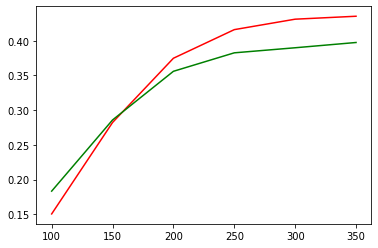

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(max_iter, trainscore, c = 'red')
plt.plot(max_iter, testscore, c = 'green')

In [ ]:
import sklearn.neural_network as nn
from sklearn.metrics import accuracy_score
random = [1,2,3,4,5,6,7,8,9,10]
trainscore = []
testscore = []
for r in random:
    MLP = nn.MLPRegressor(random_state = r)
    MLP.fit(X_train, y_train)
    trainscore.append(MLP.score(X_train,y_train))
    testscore.append(MLP.score(X_test,y_test))    
       

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(random, trainscore, c = 'red')
plt.plot(random, testscore, c = 'green')